In [7]:
path = '/media/hdd/crypto/data_yahoo'
symbol = "/BTC-USD.csv"
data = pd.read_csv(path + symbol)


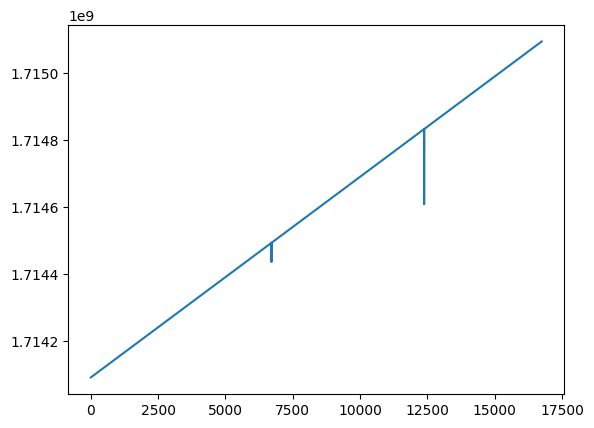

In [8]:
data.timestamp.plot()
plt.show()

In [6]:
import requests
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup, SoupStrainer
from bs4.element import Comment
from datetime import datetime
from unicodedata import normalize
from time import mktime
import csv
import json
import sys

sys.path.append('/home/ignacio/Documents/SFU/crypto/textual_analysis')
from tools_scrapping import gather_links

def clean_links(links):
    clean_links_array = []
    for link in links:
        if "quote" in link and "-USD" in link:
            clean_links_array.append(link.replace("/quote/",""))
            
    return clean_links_array

path = "/media/hdd/crypto/data_yahoo/"

In [8]:
symbols = []
offset = 0
while True:
    url = f"https://finance.yahoo.com/screener/predefined/all_cryptocurrencies_us/?count=100&offset={offset}"

    resp = requests.get(
        url,
        headers={
            "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
        },
    )
    
    links = gather_links(resp)
    
    clean_links_array = clean_links(links)
    
    symbols = symbols + clean_links_array
    
    if not resp.ok:
        break
    
    offset += 100

print(offset)
print(len(symbols))

symbols_bis = symbols.copy()
symbols = []
for x in symbols_bis:
    if x not in symbols:
        symbols.append(x)
        
print(len(symbols))

/home/ignacio/Documents/SFU/crypto/textual_analysis/tools_scrapping.py:19: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 19 of the file /home/ignacio/Documents/SFU/crypto/textual_analysis/tools_scrapping.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  for link in BeautifulSoup(response.content, parse_only=SoupStrainer('a')):


KeyboardInterrupt: 

In [9]:
FIELDNAMES = [
 'high', 'close', 'timestamp', 'low', 'open'
]

params = {
    "region": "US",
    "lang": "en-US",
    "includePrePost": False,
    "interval": "1m" ,
    "useYfid": True,
    "range": "5d",
    "corsDomain": "finance.yahoo.com",
    ".tsrc": "finance",
}

In [25]:
quote_dict['timestamp'] == None

True

In [11]:
symbol = "BABYDOGE-USD"

url = "https://query1.finance.yahoo.com/v8/finance/chart/" + symbol

resp = requests.get(
    url,
    params=params,
    headers={
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
    },
)

result_dict = resp.json().get("chart", dict()).get("result")[0]
timestamps = result_dict.get("timestamp")
quote_dict = result_dict.get("indicators").get("quote")[0]
quote_dict['timestamp'] = timestamps

data = pd.DataFrame.from_dict (quote_dict)
data = data[['timestamp', 'low', 'open', 'high', 'volume', 'close']]

filename = path + symbol + ".csv"

try:
    data_or = pd.read_csv(filename)
    data = pd.concat([data_or,data]).drop_duplicates()

except FileNotFoundError:
    pass

data.to_csv(filename, index = False)
    

ValueError: If using all scalar values, you must pass an index

In [13]:
quote_dict

{'timestamp': None}

In [28]:
pd.concat([data.iloc[-30:,:],data_or]).drop_duplicates()

,timestamp,low,open,high,volume,close
6560,1714483440,61112.585938,61112.585938,61112.585938,4980736.0,61112.585938
6561,1714483500,61111.808594,61111.808594,61111.808594,0.0,61111.808594
6562,1714483560,61159.375000,61159.375000,61159.375000,0.0,61159.375000
6563,1714483620,61140.222656,61140.222656,61140.222656,0.0,61140.222656
6564,1714483680,61170.441406,61170.441406,61170.441406,0.0,61170.441406
...,...,...,...,...,...,...
6555,1714483140,61199.078125,61199.078125,61199.078125,765952.0,61199.078125
6556,1714483200,61218.675781,61218.675781,61218.675781,23037952.0,61218.675781
6557,1714483260,61176.343750,61176.343750,61176.343750,0.0,61176.343750
6558,1714483320,61175.437500,61175.437500,61175.437500,0.0,61175.437500


In [17]:
data_or = pd.read_csv(filename)

In [15]:
pd.read_csv(filename + "s")

FileNotFoundError: [Errno 2] No such file or directory: 'data/BTC-USD.csvs'

In [36]:
quote_dict.keys()


dict_keys(['close', 'open', 'volume', 'low', 'high'])

In [8]:
result_dict['indicators']

{'quote': [{'close': [64983.53125,
    64964.22265625,
    64888.56640625,
    64829.82421875,
    64786.390625,
    64901.30078125,
    64894.703125,
    64872.34765625,
    64834.890625,
    64826.5703125,
    64859.11328125,
    64863.72265625,
    64875.8515625,
    64836.36328125,
    64859.28125,
    64897.421875,
    64878.99609375,
    64874.30859375,
    64879.890625,
    64884.8359375,
    64921.1328125,
    64909.953125,
    64897.453125,
    64887.5859375,
    64877.0859375,
    64875.90234375,
    64868.21484375,
    64873.875,
    64870.31640625,
    64900.9609375,
    64904.5859375,
    64894.265625,
    64894.89453125,
    64856.125,
    64828.92578125,
    64796.41796875,
    64703.515625,
    64793.95703125,
    64797.53515625,
    64727.984375,
    64697.05859375,
    64715.359375,
    64747.7734375,
    64728.51953125,
    64734.51171875,
    64733.93359375,
    64715.828125,
    64697.98046875,
    64702.46484375,
    64666.3515625,
    64678.3125,
    64692.035156